idx|truth|map
---|---|---
12769|0|0
7798|0|0
28753|0|0
25702|0|0
12706|0|0


In [26]:
def pandas_df_to_markdown_table(df):
    from IPython.display import Markdown, display
    fmt = ['---' for i in range(len(df.columns))]
    df_fmt = pd.DataFrame([fmt], columns=df.columns)
    df_formatted = pd.concat([df_fmt, df])
    print(df_formatted.to_csv(sep="|", index=False))
    display(Markdown(df_formatted.to_csv(sep="|", index=False)))
# print(tabulate(df[:5], list('ABCD'), tablefmt="simple"))
pandas_df_to_markdown_table(df[:5])

idx|truth|map
---|---|---
12769|0|0
7798|0|0
28753|0|0
25702|0|0
12706|0|0



idx|truth|map
---|---|---
12769|0|0
7798|0|0
28753|0|0
25702|0|0
12706|0|0


|A|B|C|D
---|---|---|---|---
A|4726|119|4845|975
C|185|450|635|708
D|4911|569|5480|0
E|962|790|0|0

In [130]:
df = pd.read_csv('https://rawgit.com/suredream/datasets/master/val_ce.csv')
def display_error_matrix(truth, pred, index=['A', 'C','Total', 'Producer Accuracy'], columns=['A', 'B', 'Total', 'User Accuracy']):
    from sklearn.metrics import confusion_matrix, cohen_kappa_score
    from IPython.display import Markdown, display

    C = confusion_matrix(truth, pred)
    kappa = (cohen_kappa_score(df['truth'], df['map']) * 1000).astype(int)
    correct = [C[i,i] for i in range(C.shape[0])]
    colsum = np.sum(C, axis=1)
    C = np.c_[C, colsum, (correct / colsum * 1000).astype(int)] # UA
    rowsum = np.sum(C, axis=0)
    pa = (correct / rowsum[:-2] * 1000).astype(int)
    rowsum[-1] = 0
    C = np.vstack([C, rowsum])
    oa = (np.sum(correct)/np.sum(colsum) * 1000).astype(int)
    C = np.vstack([C, np.append(pa,[kappa, oa])])
    ddf = pd.DataFrame(data=C, index=index, columns=columns)

    fmt = ['---' for i in range(len(ddf.columns))]
    df_fmt = pd.DataFrame([fmt], columns=ddf.columns)
    df_formatted = pd.concat([df_fmt, ddf])
    print(df_formatted.to_csv(sep="|", index=True))
    display(Markdown(df_formatted.to_csv(sep="|", index=False)))
    
display_error_matrix(df['truth'], df['map'])

|A|B|Total|User Accuracy
0|---|---|---|---
A|4726|119|4845|975
C|185|450|635|708
Total|4911|569|5480|0
Producer Accuracy|962|790|716|944



A|B|Total|User Accuracy
---|---|---|---
4726|119|4845|975
185|450|635|708
4911|569|5480|0
962|790|716|944


In [76]:
print(dir(C))

['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift__', '__rmatmul__', '__rmod__', '__rmul__', '__ror__', '__rpow__', '__rrshift_

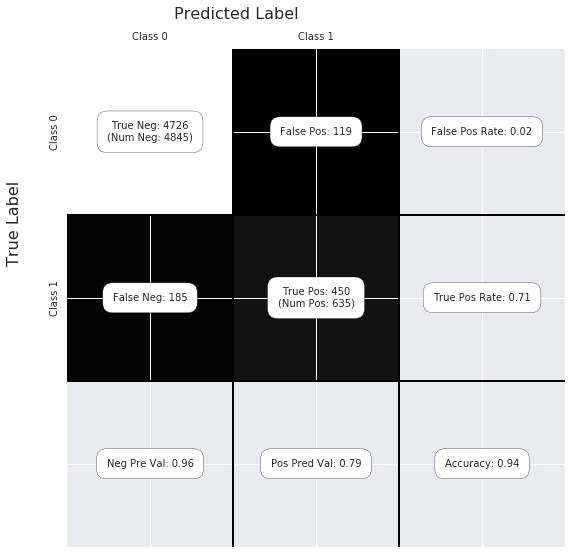

In [14]:
def show_confusion_matrix(C,class_labels=['0','1']):
    """
    C: ndarray, shape (2,2) as given by scikit-learn confusion_matrix function
    class_labels: list of strings, default simply labels 0 and 1.

    Draws confusion matrix with associated metrics.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    assert C.shape == (2,2), "Confusion matrix should be from binary classification only."
    
    # true negative, false positive, etc...
    tn = C[0,0]; fp = C[0,1]; fn = C[1,0]; tp = C[1,1];

    NP = fn+tp # Num positive examples
    NN = tn+fp # Num negative examples
    N  = NP+NN

    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111)
    ax.imshow(C, interpolation='nearest', cmap=plt.cm.gray)

    # Draw the grid boxes
    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(2.5,-0.5)
    ax.plot([-0.5,2.5],[0.5,0.5], '-k', lw=2)
    ax.plot([-0.5,2.5],[1.5,1.5], '-k', lw=2)
    ax.plot([0.5,0.5],[-0.5,2.5], '-k', lw=2)
    ax.plot([1.5,1.5],[-0.5,2.5], '-k', lw=2)

    # Set xlabels
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks([0,1,2])
    ax.set_xticklabels(class_labels + [''])
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    # These coordinate might require some tinkering. Ditto for y, below.
    ax.xaxis.set_label_coords(0.34,1.06)

    # Set ylabels
    ax.set_ylabel('True Label', fontsize=16, rotation=90)
    ax.set_yticklabels(class_labels + [''],rotation=90)
    ax.set_yticks([0,1,2])
    ax.yaxis.set_label_coords(-0.09,0.65)


    # Fill in initial metrics: tp, tn, etc...
    ax.text(0,0,
            'True Neg: %d\n(Num Neg: %d)'%(tn,NN),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,1,
            'False Neg: %d'%fn,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,0,
            'False Pos: %d'%fp,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    ax.text(1,1,
            'True Pos: %d\n(Num Pos: %d)'%(tp,NP),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    # Fill in secondary metrics: accuracy, true pos rate, etc...
    ax.text(2,0,
            'False Pos Rate: %.2f'%(fp / (fp+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,1,
            'True Pos Rate: %.2f'%(tp / (tp+fn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,2,
            'Accuracy: %.2f'%((tp+tn+0.)/N),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,2,
            'Neg Pre Val: %.2f'%(1-fn/(fn+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,2,
            'Pos Pred Val: %.2f'%(tp/(tp+fp+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    plt.tight_layout()
    plt.show()
    
from sklearn.metrics import confusion_matrix, accuracy_score

df= pd.read_csv('https://rawgit.com/suredream/datasets/master/val_ce.csv')
df[:5]

show_confusion_matrix(confusion_matrix(df['truth'], df['map']), ['Class 0', 'Class 1'])
# array([[2, 0, 0],
#        [0, 0, 1],
#        [1, 0, 2]])

In [9]:
from pdata import *
df= pd.read_csv('https://rawgit.com/suredream/datasets/master/land_area.csv')
df[:5]

,Country,Land,ADM0,region,aqua_land,aqua_cultivable,aqua_2002,pot_ir,pot_rf,faostat_tot,...,calAH_RF_ha,calAH_IR_ha,MMGA_TOT_ha,MMGA_RF_ha,MMGA_IR_ha,GCEV2,GCEV2_RF,GCEV2_IR,GLC30,GRIPC
0,Algeria,231.269454,4,1,"238,174,000","40,000,000",8265000,"510,300","39,489,700",5757848,...,2908471,570447,3236291,2727974,512517,7535356,5606509,1928848,7732043,3989280
1,Angola,124.712895,8,4,"124,670,000","32,000,000",3300000,"3,700,000","28,300,000",5978679,...,2123384,42000,2406164,2372096,35000,3539916,3429193,110723,4286455,2168749
2,Benin,11.519934,29,3,"11,262,000","7,000,000",2815000,"322,000","6,678,000",7278177,...,1787271,2823,1429889,1428467,2505,2709420,2680533,28887,2952197,2441663
3,Botswana,57.838794,35,6,"58,173,000","2,908,650",380000,"13,000","2,895,650",856268,...,166867,620,167194,166866,620,842282,828178,14104,844412,16145
4,Burkina Faso,27.394767,42,2,"27,400,000","9,000,000",4400000,"165,000","8,835,000",13220708,...,3483641,20233,3326174,3314973,14932,4194263,4169421,24841,4191354,10387004


# DecisionTree using scikit-learn
Decision Trees (DTs) are a [non-parametric supervised learning method](http://scikit-learn.org/stable/modules/tree.html) used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

- **classification**: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data. An example of classification problem would be the handwritten digit recognition example, in which the aim is to assign each input vector to one of a finite number of discrete categories. Another way to think of classification is as a discrete (as opposed to continuous) form of supervised learning where one has a limited number of categories and for each of the n samples provided, one is to try to label them with the correct category or class.
- **regression**: if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

## DecisionTreeClassifier
DecisionTreeClassifier takes as input two arrays: an array X, sparse or dense, of size [n_samples, n_features] holding the training samples, and an array Y of integer values, size [n_samples], holding the class labels for the training samples

## overfit
Decision trees tend to overfit on data with a large number of features. Getting the right ratio of samples to number of features is important, since a tree with few samples in high dimensional space is very likely to overfit.

```python
>>> from sklearn import tree
>>> X = [[0, 0], [1, 1]]
>>> Y = [0, 1]
>>> clf = tree.DecisionTreeClassifier()
>>> clf = clf.fit(X, Y)
```

## PCA


In [ ]:
## Case 1: South Africa Corn Mapping

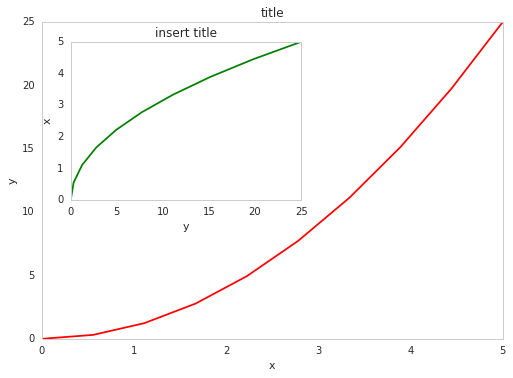

In [8]:
from pdata import *
x = np.linspace(0, 5, 10)
y = x ** 2
with sns.axes_style("whitegrid",{'axes.grid': False}):    
    fig = figure()

    axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
    axes2 = fig.add_axes([0.15, 0.45, 0.4, 0.4]) # inset axes

    # main figure
    axes1.plot(x, y, 'r')
    axes1.set_xlabel('x')
    axes1.set_ylabel('y')
    axes1.set_title('title')

    # insert
    axes2.plot(y, x, 'g')
    axes2.set_xlabel('y')
    axes2.set_ylabel('x')
    axes2.set_title('insert title');

In [5]:
df[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


* df2.head()
   Target species
0       0  setosa
1       0  setosa
2       0  setosa
3       0  setosa
4       0  setosa

* df2.tail()
     Target    species
145       2  virginica
146       2  virginica
147       2  virginica
148       2  virginica
149       2  virginica

* targets
['setosa' 'versicolor' 'virginica']

* features:
['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


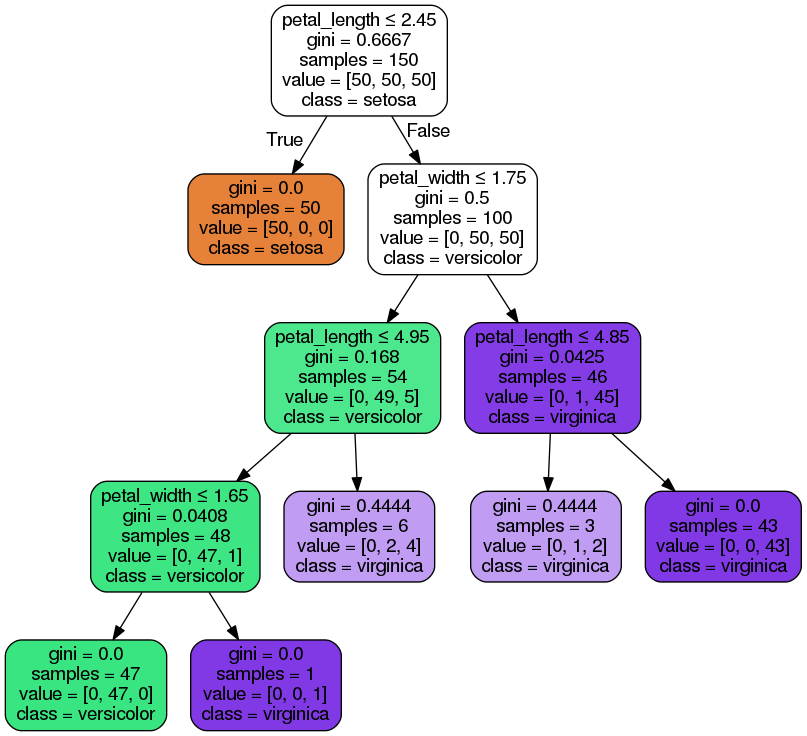

In [4]:
from IPython.display import Image
import subprocess
from sklearn.tree import DecisionTreeClassifier, export_graphviz
def encode_target(df, target_column):
    """Add column to df with integers for the target."""
    df_mod = df.copy()
    targets = df_mod[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    df_mod["Target"] = df_mod[target_column].replace(map_to_int)
    return (df_mod, targets)
import seaborn as sns
df = sns.load_dataset("iris")
df2, targets = encode_target(df, "species")
print("* df2.head()", df2[["Target", "species"]].head(),
      sep="\n", end="\n\n")
print("* df2.tail()", df2[["Target", "species"]].tail(),
      sep="\n", end="\n\n")
print("* targets", targets, sep="\n", end="\n\n")
features = list(df2.columns[:4])
print("* features:", features, sep="\n")
y = df2["Target"]
X = df2[features]
dt = DecisionTreeClassifier(min_samples_split=20, random_state=99)
dt.fit(X, y)
# visualize_tree(dt, features)
export_graphviz(dt, out_file='dt.dot', feature_names=features, class_names=targets, filled=True, rounded=True, special_characters=True)  
subprocess.check_call(["dot", "-Tpng", "dt.dot", "-o", "output/dt.png"]);
Image("output/dt.png")

In [29]:
subprocess.check_output(["echo", "Hello World!"])

NameError: name 'subprocess' is not defined

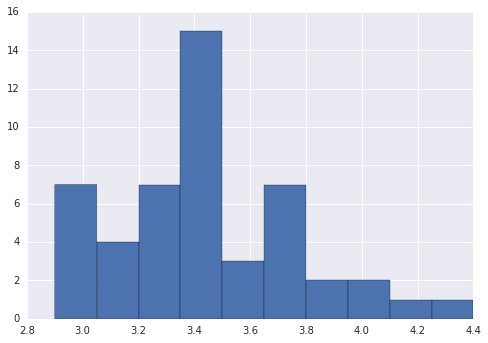

In [11]:
iris_data = iris_data.loc[(iris_data['species'] != 'setosa') | (iris_data['sepal_width'] >= 2.5)]
iris_data.loc[iris_data['species'] == 'setosa', 'sepal_width'].hist();

In [ ]:
figure(figsize=(10, 10))

for column_index, column in enumerate(iris_data.columns):
    if column == 'species':
        continue
    subplot(2, 2, column_index + 1)
    sns.violinplot(x='species', y=column, data=iris_data);

In [12]:
all_inputs = iris_data[['sepal_length', 'sepal_width',
                             'petal_length', 'petal_width']].values

# Similarly, we can extract the classes
all_classes = iris_data['species'].values

# Make sure that you don't mix up the order of the entries
# all_inputs[5] inputs should correspond to the class in all_classes[5]

# Here's what a subset of our inputs looks like:
print(all_inputs[:5])

from sklearn.cross_validation import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75, random_state=1)

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


In [13]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)


0.97368421052631582

In [18]:
from sklearn import tree
import pydot
clf = decision_tree_classifier.fit(training_inputs, training_classes)
# tree.export_graphviz(clf,out_file='tree.dot')   

# from StringIO import StringIO
from sklearn.externals.six import StringIO  
# out = StringIO()
# out = tree.export_graphviz(clf, out_file=out)
# print(out.getvalue())

import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_pdf("iris.pdf") 

Exception: "dot" not found in path.

In [45]:
from sklearn.externals.six import StringIO  
import pydot
from IPython.display import Image  
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

Exception: "dot" not found in path.

In [44]:
dir(graph[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get_attribute__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_edge',
 'add_node',
 'add_subgraph',
 'create',
 'create_attribute_methods',
 'create_canon',
 'create_cmap',
 'create_cmapx',
 'create_cmapx_np',
 'create_dia',
 'create_dot',
 'create_fig',
 'create_gd',
 'create_gd2',
 'create_gif',
 'create_hpgl',
 'create_imap',
 'create_imap_np',
 'create_ismap',
 'create_jpe',
 'create_jpeg',
 'create_jpg',
 'create_mif',
 'create_mp',
 'create_pcl',
 'create_pdf',
 'create_pic',
 'create_plain',
 'create_plain-ext',
 'create_png',
 'create_ps',
 'create_ps2',
 'create_svg',
 'create_svgz',
 'create_vml',
 'create_vmlz',
 'create_vrml',
 'crea